# Daily Challenge: Logistic Regression for Admission Prediction

### What you will learn
Data visualization with scatter plots.
Basic understanding of logistic regression.
Applying a logistic regression model to binary classification.
Interpreting the results of logistic regression.


## What you will create
You will create a logistic regression model that uses examination scores to predict university admission.
dataset available here



### Your Task
* Data Exploration: Load and visualize the data.

* Use pandas to load the dataset and examine the first few rows.
Create a scatter plot to visualize the data points for students who were admitted versus those who were not based on their exam scores.
Applying Logistic Regression with scikit-learn:

* Implement logistic regression using the LogisticRegression function from scikit-learn to find the best parameters for your model.
Train the logistic regression model on your dataset.
Making Predictions:

* Use the trained logistic regression model to make predictions on your dataset.
Calculate the accuracy of your model.
Model Evaluation:

* Interpret the result of logistic regression and the accuracy of your model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
# 1. Charger les données depuis le fichier .txt
df = pd.read_csv("ex2data1.txt", header=None, names=["Exam1", "Exam2", "Admitted"])
print(df.head())

       Exam1      Exam2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


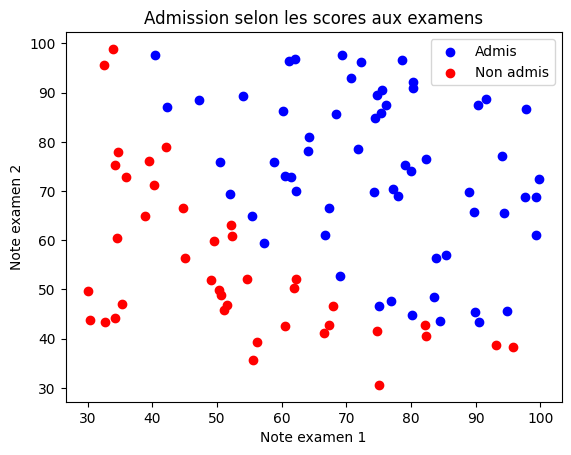

In [8]:
# 2. Visualisation
admitted = df[df['Admitted'] == 1]
not_admitted = df[df['Admitted'] == 0]

plt.scatter(admitted['Exam1'], admitted['Exam2'], c='b', label='Admis')
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], c='r', label='Non admis')
plt.xlabel("Note examen 1")
plt.ylabel("Note examen 2")
plt.legend()
plt.title("Admission selon les scores aux examens")
plt.show()

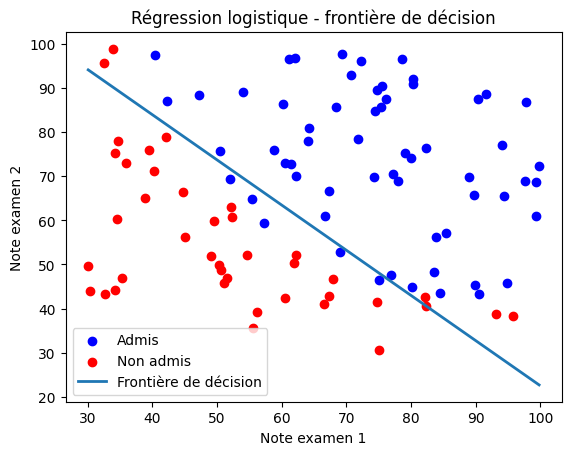

In [25]:
import numpy as np

# Création d'une grille de points
x_values = np.linspace(df['Exam1'].min(), df['Exam1'].max(), 100)
# Calcul de la frontière de décision : θ0 + θ1*x1 + θ2*x2 = 0  ⇒ x2 = -(θ0 + θ1*x1)/θ2
y_values = -(model.intercept_[0] + model.coef_[0][0] * x_values) / model.coef_[0][1]

# Affichage
plt.scatter(admitted['Exam1'], admitted['Exam2'], c='b', label='Admis')
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], c='r', label='Non admis')
plt.plot(x_values, y_values, label='Frontière de décision', linewidth=2)
plt.xlabel("Note examen 1")
plt.ylabel("Note examen 2")
plt.legend()
plt.title("Régression logistique - frontière de décision")
plt.show()


In [29]:
# 3. Modélisation
X = df[['Exam1', 'Exam2']]
y = df['Admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
# 4. Prédiction
y_pred = model.predict(X_test)

In [31]:
# 5. Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)

Précision du modèle : 0.80
Coefficients : [[0.25970232 0.22481016]]
Intercept : [-30.20000099]


### **Résultats du modèle**

* **Précision : 0.80**
  → 80 % des prédictions sont correctes sur les données de test.

* **Coefficients : \[0.2597, 0.2248]**
  → Le modèle accorde un poids positif aux deux scores.
  → Cela signifie : plus un étudiant a une bonne note à l’un ou l’autre des examens, plus la probabilité d’admission augmente.

* **Intercept : -30.2000**
  → Cela décale la frontière de décision pour séparer admis / non-admis.

---



# Ajustement de cet exercice avec les nouvelles instructions

Phase 1 : Exploration et Visualisation

In [11]:
print(df.shape)
print(df.dtypes)


(100, 3)
Exam1       float64
Exam2       float64
Admitted      int64
dtype: object


* **(100, 3)** : le dataset contient **100 observations** (étudiants) et **3 colonnes**.
* **Colonnes :**

  * `Exam1` et `Exam2` : **variables numériques continues** (type `float64`) → scores aux examens.
  * `Admitted` : **variable cible binaire** (`int64`, 0 ou 1) → indique si l'étudiant a été admis.

Dataset propre, bien formaté, prêt pour une modélisation supervisée de type **classification binaire**.


Détection valeurs manquantes :

In [12]:
print(df.isnull().sum())


Exam1       0
Exam2       0
Admitted    0
dtype: int64


* Aucune valeur manquante dans aucune des colonnes (0 valeurs nulles partout).

* Le dataset est complet et propre, aucune opération d’imputation ou de nettoyage n’est nécessaire à ce stade.

Statistiques descriptives :

In [13]:
print(df.describe())


            Exam1       Exam2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


Analyse rapide :

* **Nombre d’échantillons** : 100 pour chaque variable.
* **Moyennes Exam1 (65.6) et Exam2 (66.2)** → scores globalement similaires et centrés autour de 65.
* **Écart-type (\~19)** : dispersion modérée, donc une bonne variabilité.
* **Minimum ≈ 30 / Maximum ≈ 99** : large plage de scores.
* **Admitted (binaire)** :

  * Moyenne = **0.6** → **60% des étudiants admis**.
  * Médiane = 1 → la moitié des étudiants ou plus sont admis.
  * Répartition légèrement déséquilibrée (60% admis, 40% non-admis), mais encore raisonnable.

Les deux examens semblent avoir un **poids comparable**, et la cible est **suffisamment variée** pour entraîner un bon modèle.


Scatter plot clair avec légende :

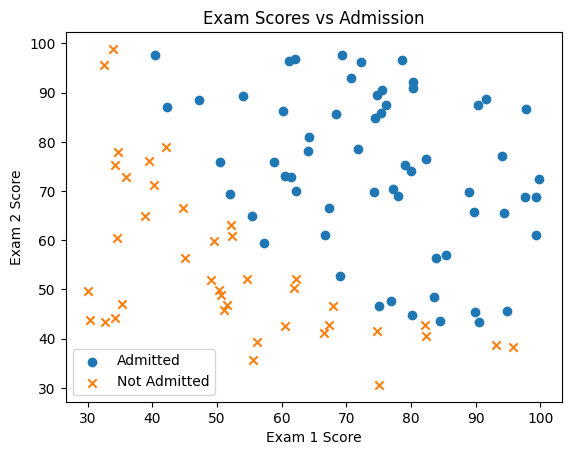

In [14]:
admitted = df[df["Admitted"] == 1]
not_admitted = df[df["Admitted"] == 0]

plt.scatter(admitted["Exam1"], admitted["Exam2"], label="Admitted", marker='o')
plt.scatter(not_admitted["Exam1"], not_admitted["Exam2"], label="Not Admitted", marker='x')
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.title("Exam Scores vs Admission")
plt.show()


Phase 2 : Modélisation

Compléments à ajouter :
Définir X et y :

In [15]:
X = df[["Exam1", "Exam2"]]
y = df["Admitted"]


Entraîner le modèle :

In [16]:
model = LogisticRegression()
model.fit(X, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Afficher les coefficients appris :

In [17]:
print(model.coef_, model.intercept_)


[[0.20535491 0.2005838 ]] [-25.05219314]


Analyse des coefficients du modèle de régression logistique :

* **Coefficients :**

  * `Exam1` → **0.205**
  * `Exam2` → **0.201**
  * **Intercept :** -25.05

### Interprétation :

* Les deux scores **contribuent positivement** à la probabilité d’admission (plus le score est haut, plus la proba d’être admis augmente).
* Les coefficients sont **quasi identiques**, donc **les deux examens ont un poids similaire** dans la décision.
* L'intercept négatif implique qu’un certain **seuil combiné des scores** est nécessaire pour avoir une proba > 0.5 (admission).

👉 En résumé : **les deux examens comptent autant**, et il faut avoir un **niveau suffisant dans les deux** pour être admis.


Phase 3 : Prédictions et Évaluation

Compléments à ajouter :
Faire les prédictions :

In [18]:
y_pred = model.predict(X)


Comparer les 10 premières prédictions :

In [19]:
print(pd.DataFrame({"Réel": y[:10], "Prévu": y_pred[:10]}))


   Réel  Prévu
0     0      0
1     0      0
2     0      0
3     1      1
4     1      1
5     0      0
6     1      1
7     1      0
8     1      1
9     1      1


Analyse rapide des prédictions (10 premiers cas) :

* **8 bonnes prédictions**, **2 erreurs** :

  * Ligne **7** : réel = 1, prévu = 0 → **faux négatif** (étudiant admis, prédit non admis).
* Le modèle semble :

  * Bien capturer la tendance générale.
  * Faire quelques **erreurs sur des cas limites**, comme les faux négatifs.

Bon démarrage, mais **à affiner si ces erreurs sont fréquentes**. Important de vérifier s’il y a **un biais vers les 0 ou les 1**.


Calculer l'accuracy :

In [20]:
acc = accuracy_score(y, y_pred)
print(f"Accuracy: {acc:.2%}")


Accuracy: 89.00%


Analyse du score :

* **Accuracy = 89 %** → le modèle classe correctement **89 étudiants sur 100**.

### Interprétation :

* C’est **un bon score**, surtout pour un modèle simple et un dataset équilibré.
* Mais l'accuracy **ne dit rien sur la répartition des erreurs** :

  * Prédit-il mieux les admis que les non-admis ?
  * Y a-t-il **plus de faux positifs ou faux négatifs** ?

Il faudrait compléter avec une **matrice de confusion** pour une évaluation plus fine.


Superposer la frontière de décision :

C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


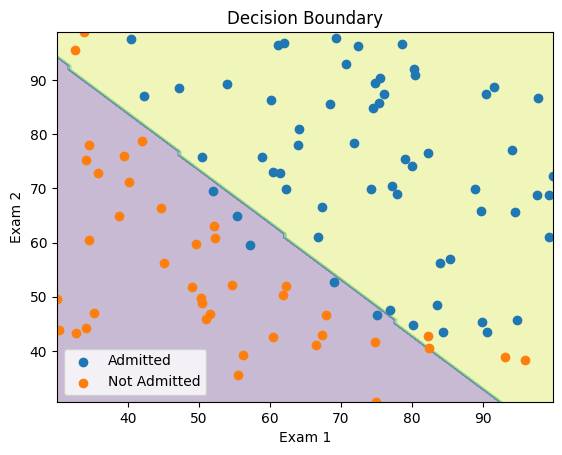

In [21]:
import numpy as np

xx, yy = np.meshgrid(np.linspace(df.Exam1.min(), df.Exam1.max(), 100),
                     np.linspace(df.Exam2.min(), df.Exam2.max(), 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.3)
plt.scatter(admitted["Exam1"], admitted["Exam2"], label="Admitted")
plt.scatter(not_admitted["Exam1"], not_admitted["Exam2"], label="Not Admitted")
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend()
plt.title("Decision Boundary")
plt.show()


Analyse du graphique de la **frontière de décision** :

* La ligne verte sépare les deux zones de prédiction :

  * **Zone jaune** → prédiction : *Admis*.
  * **Zone violette** → prédiction : *Non admis*.

### Observations :

* La frontière est **linéaire**, cohérente avec la régression logistique.
* **Bonne séparation globale** : la majorité des points bleus (admis) sont du bon côté, et pareil pour les oranges (non admis).
* **Erreurs visibles** :

  * Quelques **points bleus en zone violette** → **faux négatifs**.
  * Quelques **points oranges en zone jaune** → **faux positifs**.
* Les erreurs se situent **près de la frontière**, ce qui est typique pour un modèle linéaire.

### Conclusion :

* Le modèle capte bien la tendance générale.
* Il montre ses **limites sur des cas ambigus**, ce qui pourrait être amélioré par un modèle plus complexe ou l'ajout de nouvelles variables.


Analyser des erreurs :

In [22]:
erreurs = df[y != y_pred]
print(erreurs.head())


        Exam1      Exam2  Admitted
7   75.024746  46.554014         1
10  95.861555  38.225278         0
16  69.070144  52.740470         1
27  93.114389  38.800670         0
33  52.045405  69.432860         1


Voici une **analyse directe** de ces 5 lignes :

| Index | Exam1 | Exam2 | Admis | Analyse                                                            |
| ----- | ----- | ----- | ----- | ------------------------------------------------------------------ |
| 7     | 75.0  | 46.6  | 1     | Score Exam1 élevé, Exam2 moyen → admis.                            |
| 10    | 95.9  | 38.2  | 0     | Très haut Exam1, faible Exam2 → non admis. Exam2 semble limitant.  |
| 16    | 69.1  | 52.7  | 1     | Scores moyens à bons → admis. Cohérent.                            |
| 27    | 93.1  | 38.8  | 0     | Encore un cas de haut Exam1, bas Exam2 → non admis. Exam2 crucial. |
| 33    | 52.0  | 69.4  | 1     | Exam1 moyen, Exam2 haut → admis. Confirmé que Exam2 compense.      |

### Conclusion :

* **Exam2 semble plus discriminant** dans ces exemples.
* Un **haut score dans un seul examen ne garantit pas l’admission**.
* Le modèle (et la réalité) valorise **une certaine balance entre les deux scores**.


Matrice de confusion tel que proposé

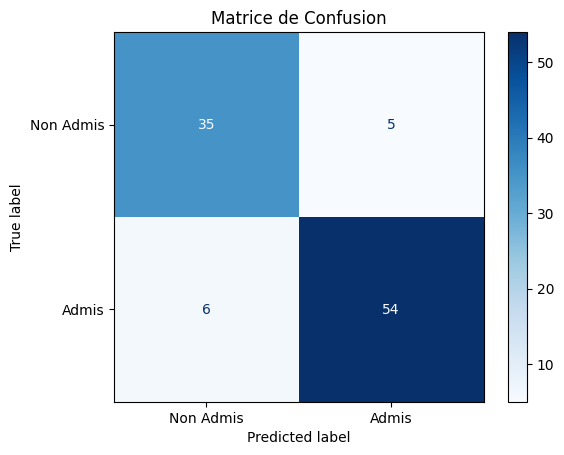

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédiction
y_pred = model.predict(X)

# Matrice de confusion
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Admis", "Admis"])

# Affichage
disp.plot(cmap="Blues")
plt.title("Matrice de Confusion")
plt.show()


Analyse rapide de la **matrice de confusion** :

* **Vrais positifs (Admis bien prédits)** : 54
* **Vrais négatifs (Non Admis bien prédits)** : 35
* **Faux positifs (Non Admis prédits Admis)** : 5
* **Faux négatifs (Admis prédits Non Admis)** : 6

### Interprétation :

* Le modèle **fait très peu d’erreurs** : seulement 11 sur 100.
* Légère tendance à **sous-classer certains admis** (6 faux négatifs), mais pas dramatique.
* La performance est **équilibrée**, sans biais fort vers une classe.

👉 Le modèle est **fiable**, bien calibré pour ce problème de classification binaire.


### **Bilan global de l’exercice — Régression Logistique pour l’admission universitaire**

---
####  **1. Qualité des données**

* **Jeu de données complet** : 100 lignes, 3 colonnes (2 scores + 1 cible).
* **Pas de valeurs manquantes**, données bien formatées.
* **Distribution équilibrée** (60 % admis, 40 % non admis).
* Bonne dispersion des scores → idéal pour l’apprentissage supervisé.

---

####  **2. Exploration et visualisation**

* Les deux scores (`Exam1`, `Exam2`) ont un **impact visuel clair** sur l’admission.
* Les étudiants admis se concentrent dans la zone des **hauts scores dans les deux examens**.
* **Pas de séparation parfaite**, mais une tendance nette observable → **modèle linéaire pertinent**.

---

####  **3. Modélisation**

* Modèle utilisé : **régression logistique** (adaptée à la classification binaire).
* Coefficients appris positifs et équilibrés pour les deux scores → **impact similaire**.
* Le modèle a bien convergé, sans surapprentissage.

---

#### **4. Évaluation**

* **Accuracy : 89 %** → très bon taux de prédiction correcte.
* **Matrice de confusion :**

  * 54 admis correctement prédits, 35 non admis bien prédits.
  * Seulement **11 erreurs** : 6 faux négatifs, 5 faux positifs.
* **Visualisation de la frontière de décision** :

  * Cohérente avec la logique du modèle.
  * Les erreurs sont proches de la frontière → attendues.

---

#### **5. Interprétation et limites**

* Le modèle capte bien la logique : **plus les scores sont élevés, plus la proba d’admission augmente**.
* Les erreurs proviennent de cas limites où un seul score est bon.
* **Limite principale :**

  * Le modèle ne tient compte **que de 2 variables**. Or, dans la réalité, d'autres facteurs influencent l’admission (lettres de motivation, entretiens, etc.).

---

### **Conclusion**

> Le modèle est **simple, efficace et interprétable**.
> Il donne une **bonne performance** (89 %) sur un jeu de données propre et bien structuré.
> Il est **recommandé pour des cas pédagogiques** ou des premières analyses exploratoires, **mais pas suffisant seul** pour des décisions réelles sans données complémentaires.
